In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('data.csv', encoding='gb18030')

In [26]:
df.head()

,comment,star
0,口味：不知道是我口高了，还是这家真不怎么样。 我感觉口味确实很一般很一般。上菜相当快，我敢说...,2
1,菜品丰富质量好，服务也不错！很喜欢！,4
2,说真的，不晓得有人排队的理由，香精香精香精香精，拜拜！,2
3,菜量实惠，上菜还算比较快，疙瘩汤喝出了秋日的暖意，烧茄子吃出了大阪烧的味道，想吃土豆片也是口...,5
4,先说我算是娜娜家风荷园开业就一直在这里吃 每次出去回来总想吃一回 有时觉得外面的西式简餐总是...,4


In [0]:
df["sentiment"] = df.star.apply(lambda x: 1 if x>3 else 0)

In [28]:
df.sentiment.describe()

count    2000.000000
mean        0.500000
std         0.500125
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: sentiment, dtype: float64

In [29]:
df.head()

,comment,star,sentiment
0,口味：不知道是我口高了，还是这家真不怎么样。 我感觉口味确实很一般很一般。上菜相当快，我敢说...,2,0
1,菜品丰富质量好，服务也不错！很喜欢！,4,1
2,说真的，不晓得有人排队的理由，香精香精香精香精，拜拜！,2,0
3,菜量实惠，上菜还算比较快，疙瘩汤喝出了秋日的暖意，烧茄子吃出了大阪烧的味道，想吃土豆片也是口...,5,1
4,先说我算是娜娜家风荷园开业就一直在这里吃 每次出去回来总想吃一回 有时觉得外面的西式简餐总是...,4,1


In [0]:
df.drop('star', axis=1, inplace=True)

In [0]:
df.to_csv('dianping.csv', encoding='gb18030', index=None)

In [0]:
df = pd.read_csv('dianping.csv', encoding='gb18030')

In [49]:
df.head()

,comment,sentiment
0,口味：不知道是我口高了，还是这家真不怎么样。 我感觉口味确实很一般很一般。上菜相当快，我敢说...,0
1,菜品丰富质量好，服务也不错！很喜欢！,1
2,说真的，不晓得有人排队的理由，香精香精香精香精，拜拜！,0
3,菜量实惠，上菜还算比较快，疙瘩汤喝出了秋日的暖意，烧茄子吃出了大阪烧的味道，想吃土豆片也是口...,1
4,先说我算是娜娜家风荷园开业就一直在这里吃 每次出去回来总想吃一回 有时觉得外面的西式简餐总是...,1


In [38]:
!pip install jieba

    100% |████████████████████████████████| 7.3MB 4.3MB/s 
  Running setup.py bdist_wheel for jieba ... - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/c9/c7/63/a9ec0322ccc7c365fd51e475942a82395807186e94f0522243
Successfully built jieba


In [0]:
import jieba

In [0]:
df['text'] = df.comment.apply(lambda x: " ".join(jieba.cut(x)))

In [51]:
df.head()

,comment,sentiment,text
0,口味：不知道是我口高了，还是这家真不怎么样。 我感觉口味确实很一般很一般。上菜相当快，我敢说...,0,口味 ： 不 知道 是 我口 高 了 ， 还是 这家 真 不怎么样 。 我 感觉 口味 ...
1,菜品丰富质量好，服务也不错！很喜欢！,1,菜品 丰富 质量 好 ， 服务 也 不错 ！ 很 喜欢 ！
2,说真的，不晓得有人排队的理由，香精香精香精香精，拜拜！,0,说真的 ， 不 晓得 有人 排队 的 理由 ， 香精 香精 香精 香精 ， 拜拜 ！
3,菜量实惠，上菜还算比较快，疙瘩汤喝出了秋日的暖意，烧茄子吃出了大阪烧的味道，想吃土豆片也是口...,1,菜量 实惠 ， 上菜 还 算 比较 快 ， 疙瘩汤 喝出 了 秋日 的 暖意 ， 烧茄子 吃...
4,先说我算是娜娜家风荷园开业就一直在这里吃 每次出去回来总想吃一回 有时觉得外面的西式简餐总是...,1,先说 我 算是 娜娜 家风 荷园 开业 就 一直 在 这里 吃 每次 出去 回来 总想 ...


In [0]:
df = df[['text', 'sentiment']]

In [53]:
df.head()

,text,sentiment
0,口味 ： 不 知道 是 我口 高 了 ， 还是 这家 真 不怎么样 。 我 感觉 口味 ...,0
1,菜品 丰富 质量 好 ， 服务 也 不错 ！ 很 喜欢 ！,1
2,说真的 ， 不 晓得 有人 排队 的 理由 ， 香精 香精 香精 香精 ， 拜拜 ！,0
3,菜量 实惠 ， 上菜 还 算 比较 快 ， 疙瘩汤 喝出 了 秋日 的 暖意 ， 烧茄子 吃...,1
4,先说 我 算是 娜娜 家风 荷园 开业 就 一直 在 这里 吃 每次 出去 回来 总想 ...,1


In [46]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

Using TensorFlow backend.


In [0]:
maxlen = 100
max_words = 10000

In [0]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df.text)
sequences = tokenizer.texts_to_sequences(df.text)

In [0]:
word_index = tokenizer.word_index

In [0]:
data = pad_sequences(sequences, maxlen=maxlen)

In [144]:
data

array([[   2,    1,   74, ..., 4471,  864,    4],
       [   0,    0,    0, ...,    9,   52,    6],
       [   0,    0,    0, ...,    1, 3154,    6],
       ...,
       [   0,    0,    0, ..., 2840,    1, 2240],
       [   0,    0,    0, ...,   19,   44,  196],
       [   0,    0,    0, ...,  533,   42,    6]], dtype=int32)

In [0]:
labels = np.array(df.sentiment)

In [0]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [0]:
training_samples = int(len(indices) * .8)
validation_samples = len(indices) - training_samples

In [156]:
training_samples

1600

In [0]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [0]:
#labels

In [0]:
#sequences

In [0]:
#sequences[0]

In [61]:
#pad_sequences(sequences, maxlen=maxlen)

array([[   2,    1,   74, ..., 4471,  864,    4],
       [   0,    0,    0, ...,    9,   52,    6],
       [   0,    0,    0, ...,    1, 3154,    6],
       ...,
       [   0,    0,    0, ..., 2840,    1, 2240],
       [   0,    0,    0, ...,   19,   44,  196],
       [   0,    0,    0, ...,  533,   42,    6]], dtype=int32)

In [123]:
df.head()

,text,sentiment,seq
0,口味 ： 不 知道 是 我口 高 了 ， 还是 这家 真 不怎么样 。 我 感觉 口味 ...,0,"[2, 1, 74, 691, 4467, 4, 1798, 1417, 4, 4, 4, ..."
1,菜品 丰富 质量 好 ， 服务 也 不错 ！ 很 喜欢 ！,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,说真的 ， 不 晓得 有人 排队 的 理由 ， 香精 香精 香精 香精 ， 拜拜 ！,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,菜量 实惠 ， 上菜 还 算 比较 快 ， 疙瘩汤 喝出 了 秋日 的 暖意 ， 烧茄子 吃...,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,先说 我 算是 娜娜 家风 荷园 开业 就 一直 在 这里 吃 每次 出去 回来 总想 ...,1,"[2474, 5, 1032, 16, 97, 27, 2, 173, 5, 16, 661..."


In [0]:
df["seq"] = list(pad_sequences(sequences, maxlen=maxlen))

In [127]:
df.head()

,text,sentiment,seq
0,口味 ： 不 知道 是 我口 高 了 ， 还是 这家 真 不怎么样 。 我 感觉 口味 ...,0,"[2, 1, 74, 691, 4467, 4, 1798, 1417, 4, 4, 4, ..."
1,菜品 丰富 质量 好 ， 服务 也 不错 ！ 很 喜欢 ！,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,说真的 ， 不 晓得 有人 排队 的 理由 ， 香精 香精 香精 香精 ， 拜拜 ！,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,菜量 实惠 ， 上菜 还 算 比较 快 ， 疙瘩汤 喝出 了 秋日 的 暖意 ， 烧茄子 吃...,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,先说 我 算是 娜娜 家风 荷园 开业 就 一直 在 这里 吃 每次 出去 回来 总想 ...,1,"[2474, 5, 1032, 16, 97, 27, 2, 173, 5, 16, 661..."


In [0]:
import numpy as np

In [0]:
df.seq = df.seq.apply(lambda x: np.array(x))

In [0]:
X = df.seq ; y = df.sentiment

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=1)

In [134]:
X_train.head()

650     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1104    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
561     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
643     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
441     [3622, 1, 760, 803, 1, 114, 52, 2, 20, 132, 7,...
Name: seq, dtype: object

In [70]:
len(X_train)

1500

In [74]:
!pip install gensim

    100% |████████████████████████████████| 23.6MB 1.4MB/s 
    100% |████████████████████████████████| 1.4MB 12.9MB/s 
    100% |████████████████████████████████| 133kB 29.6MB/s 
    100% |████████████████████████████████| 4.8MB 6.7MB/s 
    100% |████████████████████████████████| 61kB 24.0MB/s 
    100% |████████████████████████████████| 552kB 25.8MB/s 
  Running setup.py bdist_wheel for smart-open ... - done
  Stored in directory: /root/.cache/pip/wheels/23/00/44/e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /root/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


In [0]:
from gensim.models import KeyedVectors

In [0]:
zh_model = KeyedVectors.load_word2vec_format('zh.vec')

In [77]:
zh_model.vectors[0]

array([ 8.6988e-02,  9.1123e-02,  3.0722e-02,  3.4160e-03,  2.7568e-02,
        5.4995e-03,  1.0905e-01,  4.9999e-02, -1.9161e-01,  4.2729e-02,
        1.3284e-01, -4.2997e-02,  4.4196e-02, -4.6042e-02,  5.2395e-02,
       -1.3002e-01,  1.1440e-01, -1.5359e-01,  5.7565e-02,  1.3344e-01,
       -6.4197e-02,  5.3679e-02,  1.3349e-01,  6.1268e-02, -2.4911e-03,
        1.9382e-01,  4.4253e-02, -2.0858e-02, -8.0714e-02,  1.0053e-01,
        5.8553e-02,  6.3155e-02, -2.9961e-02, -3.1906e-02,  5.6153e-02,
        5.1014e-02,  1.0752e-01, -7.4407e-02,  9.1990e-02,  1.7744e-01,
       -5.9959e-02,  1.4046e-01, -8.0201e-02,  4.3989e-02, -9.5205e-02,
        1.3022e-02,  9.1900e-02,  2.4317e-02, -7.0992e-02, -1.5179e-01,
       -3.0031e-02,  1.0344e-01, -5.8155e-02,  3.5950e-02, -5.5085e-02,
        4.7587e-02, -1.4251e-01, -1.3986e-01, -1.3891e-01,  6.9042e-03,
        9.0945e-02, -5.5156e-02,  6.8180e-02,  1.1948e-01,  7.8577e-03,
        1.0014e-01, -4.2805e-02,  2.2362e-01, -2.6212e-02, -3.53

In [83]:
list(iter(zh_model.vocab))

['的',
 '</s>',
 '在',
 '是',
 '年',
 '和',
 '了',
 '於',
 '為',
 '有',
 '被',
 '中',
 '與',
 '也',
 '他',
 '年月日',
 '月',
 '而',
 '人',
 '为',
 '由',
 '上',
 '後',
 '等',
 '但',
 '及',
 '以',
 '都',
 '到',
 '不',
 '對',
 '一个',
 '与',
 '或',
 '之',
 '其',
 '可以',
 '使用',
 '就',
 '日',
 '至',
 '于',
 '香港',
 '中国',
 '來',
 '日本',
 '我',
 '并',
 '會',
 '所',
 '以及',
 '一個',
 '后',
 '其中',
 '下',
 '她',
 '時',
 '又',
 '曾',
 '对',
 '軍',
 '主要',
 '自己',
 '包括',
 '最',
 '将',
 '新',
 '其他',
 '公司',
 '地',
 '因此',
 '可',
 '從',
 '亦',
 '更',
 '站',
 '大',
 '臺',
 '已',
 '多',
 '說',
 '世界',
 '長',
 '它',
 '製',
 '政府',
 '可能',
 '向',
 '把',
 '要',
 '一',
 '用',
 '研究',
 '不同',
 '因為',
 '個',
 '台灣',
 '之一',
 '相似',
 '馬',
 '前',
 '但是',
 '一些',
 '內',
 '該',
 '这',
 '中國',
 '如果',
 '能',
 '工作',
 '时',
 '从',
 '成立',
 '位于',
 '文本',
 '所有',
 '米',
 '很',
 '開始',
 '小',
 '美国',
 '使',
 '中心',
 '因',
 '你',
 '即',
 '没有',
 '此',
 '美國',
 '提供',
 '時間',
 '約',
 '目前',
 '代表',
 '部分',
 '進行',
 '第一',
 '表示',
 '認為',
 '会',
 '管理',
 '进行',
 '他們',
 '成為',
 '不是',
 '作品',
 '道',
 '就是',
 '所以',
 '稱',
 '讓',
 '再',
 '需要',
 '文化',
 '公里',
 '如',
 

In [84]:
zh_model[next(iter(zh_model.vocab))]

array([ 8.6988e-02,  9.1123e-02,  3.0722e-02,  3.4160e-03,  2.7568e-02,
        5.4995e-03,  1.0905e-01,  4.9999e-02, -1.9161e-01,  4.2729e-02,
        1.3284e-01, -4.2997e-02,  4.4196e-02, -4.6042e-02,  5.2395e-02,
       -1.3002e-01,  1.1440e-01, -1.5359e-01,  5.7565e-02,  1.3344e-01,
       -6.4197e-02,  5.3679e-02,  1.3349e-01,  6.1268e-02, -2.4911e-03,
        1.9382e-01,  4.4253e-02, -2.0858e-02, -8.0714e-02,  1.0053e-01,
        5.8553e-02,  6.3155e-02, -2.9961e-02, -3.1906e-02,  5.6153e-02,
        5.1014e-02,  1.0752e-01, -7.4407e-02,  9.1990e-02,  1.7744e-01,
       -5.9959e-02,  1.4046e-01, -8.0201e-02,  4.3989e-02, -9.5205e-02,
        1.3022e-02,  9.1900e-02,  2.4317e-02, -7.0992e-02, -1.5179e-01,
       -3.0031e-02,  1.0344e-01, -5.8155e-02,  3.5950e-02, -5.5085e-02,
        4.7587e-02, -1.4251e-01, -1.3986e-01, -1.3891e-01,  6.9042e-03,
        9.0945e-02, -5.5156e-02,  6.8180e-02,  1.1948e-01,  7.8577e-03,
        1.0014e-01, -4.2805e-02,  2.2362e-01, -2.6212e-02, -3.53

In [88]:
len(zh_model[next(iter(zh_model.vocab))])

300

In [87]:
word_index

{'，': 1,
 '的': 2,
 '了': 3,
 '。': 4,
 '\xa0': 5,
 '！': 6,
 '是': 7,
 '吃': 8,
 '很': 9,
 '也': 10,
 '都': 11,
 '不': 12,
 '味道': 13,
 '就': 14,
 '还': 15,
 '我': 16,
 '不错': 17,
 '去': 18,
 '好': 19,
 '菜': 20,
 '没有': 21,
 '好吃': 22,
 '说': 23,
 '有': 24,
 '人': 25,
 '就是': 26,
 '点': 27,
 '服务员': 28,
 '可以': 29,
 '和': 30,
 '没': 31,
 '…': 32,
 '我们': 33,
 '等': 34,
 '来': 35,
 '多': 36,
 '一般': 37,
 '在': 38,
 '吧': 39,
 '上': 40,
 '环境': 41,
 '一个': 42,
 '还是': 43,
 '菜品': 44,
 '服务': 45,
 '但是': 46,
 '给': 47,
 '排队': 48,
 '到': 49,
 '感觉': 50,
 '口味': 51,
 '喜欢': 52,
 '？': 53,
 '真的': 54,
 '太': 55,
 '再': 56,
 '挺': 57,
 '什么': 58,
 '啊': 59,
 '要': 60,
 '特别': 61,
 '大': 62,
 '推荐': 63,
 '比较': 64,
 '不是': 65,
 '这': 66,
 '不会': 67,
 '有点': 68,
 '觉得': 69,
 '很多': 70,
 '～': 71,
 '你': 72,
 '号': 73,
 '还有': 74,
 '知道': 75,
 '店': 76,
 '、': 77,
 '才': 78,
 '又': 79,
 '这个': 80,
 '上菜': 81,
 '小': 82,
 '小时': 83,
 '这么': 84,
 '非常': 85,
 '做': 86,
 '里面': 87,
 '家': 88,
 '着': 89,
 '个': 90,
 '肉': 91,
 '时候': 92,
 '而且': 93,
 '东西': 94,
 '过': 95,
 '但': 96,
 '朋友'

In [0]:
embedding_dim = len(zh_model[next(iter(zh_model.vocab))])

In [0]:
# embedding_matrix = np.zeros((max_words, embedding_dim))

In [0]:
embedding_matrix = np.random.rand(max_words, embedding_dim)

In [183]:
embedding_matrix

array([[0.28777845, 0.4824315 , 0.97268032, ..., 0.68098641, 0.69420823,
        0.11785805],
       [0.80813255, 0.48377694, 0.1284074 , ..., 0.63203803, 0.58011185,
        0.4473811 ],
       [0.57705585, 0.40979445, 0.53305782, ..., 0.24157283, 0.27572182,
        0.47146416],
       ...,
       [0.60994758, 0.44236889, 0.22139597, ..., 0.67394527, 0.36598241,
        0.08796741],
       [0.39325209, 0.67697791, 0.1884866 , ..., 0.84430915, 0.66454174,
        0.75892098],
       [0.41767013, 0.2454646 , 0.34305627, ..., 0.54859932, 0.29401925,
        0.84000079]])

In [0]:
embedding_matrix = (embedding_matrix - 0.5) * 10

In [212]:
embedding_matrix

array([[-2.12221548, -0.17568501,  4.72680325, ...,  1.80986415,
         1.94208232, -3.82141952],
       [ 3.08132552, -0.16223059, -3.71592598, ...,  1.32038029,
         0.80111854, -0.52618904],
       [-4.13011998, -4.08877   , -4.69278   , ..., -3.90500002,
        -5.53695001, -4.66177002],
       ...,
       [ 1.09947581, -0.57631111, -2.78604028, ...,  1.73945275,
        -1.34017592, -4.12032589],
       [-1.06747906,  1.76977912, -3.11513403, ...,  3.44309148,
         1.64541745,  2.58920978],
       [-0.82329869, -2.54535397, -1.56943729, ...,  0.48599321,
        -2.05980747,  3.40000789]])

In [96]:
zh_model.get_vector('的')

array([ 8.6988e-02,  9.1123e-02,  3.0722e-02,  3.4160e-03,  2.7568e-02,
        5.4995e-03,  1.0905e-01,  4.9999e-02, -1.9161e-01,  4.2729e-02,
        1.3284e-01, -4.2997e-02,  4.4196e-02, -4.6042e-02,  5.2395e-02,
       -1.3002e-01,  1.1440e-01, -1.5359e-01,  5.7565e-02,  1.3344e-01,
       -6.4197e-02,  5.3679e-02,  1.3349e-01,  6.1268e-02, -2.4911e-03,
        1.9382e-01,  4.4253e-02, -2.0858e-02, -8.0714e-02,  1.0053e-01,
        5.8553e-02,  6.3155e-02, -2.9961e-02, -3.1906e-02,  5.6153e-02,
        5.1014e-02,  1.0752e-01, -7.4407e-02,  9.1990e-02,  1.7744e-01,
       -5.9959e-02,  1.4046e-01, -8.0201e-02,  4.3989e-02, -9.5205e-02,
        1.3022e-02,  9.1900e-02,  2.4317e-02, -7.0992e-02, -1.5179e-01,
       -3.0031e-02,  1.0344e-01, -5.8155e-02,  3.5950e-02, -5.5085e-02,
        4.7587e-02, -1.4251e-01, -1.3986e-01, -1.3891e-01,  6.9042e-03,
        9.0945e-02, -5.5156e-02,  6.8180e-02,  1.1948e-01,  7.8577e-03,
        1.0014e-01, -4.2805e-02,  2.2362e-01, -2.6212e-02, -3.53

In [95]:
zh_model.get_vector("王树义")

KeyError: ignored

In [0]:
for word, i in word_index.items():
    if i < max_words:
        try:
#           print(word)
          embedding_vector = zh_model.get_vector(word)
#           print(embedding_vector)
          embedding_matrix[i] = embedding_vector
#           print(embedding_matrix[i])
        except:
          pass
            

In [214]:
embedding_matrix

array([[-2.12221548, -0.17568501,  4.72680325, ...,  1.80986415,
         1.94208232, -3.82141952],
       [ 3.08132552, -0.16223059, -3.71592598, ...,  1.32038029,
         0.80111854, -0.52618904],
       [ 0.086988  ,  0.091123  ,  0.030722  , ...,  0.1095    ,
        -0.053695  ,  0.033823  ],
       ...,
       [ 1.09947581, -0.57631111, -2.78604028, ...,  1.73945275,
        -1.34017592, -4.12032589],
       [-1.06747906,  1.76977912, -3.11513403, ...,  3.44309148,
         1.64541745,  2.58920978],
       [-0.82329869, -2.54535397, -1.56943729, ...,  0.48599321,
        -2.05980747,  3.40000789]])

In [215]:
embedding_matrix[200:300]

array([[-0.092746  ,  0.45572001,  0.032511  , ..., -0.088333  ,
         0.36285999, -0.018011  ],
       [ 0.017792  ,  0.10462   ,  0.08109   , ...,  0.033835  ,
        -0.16196001, -0.018458  ],
       [-0.10742   ,  0.11463   , -0.14602999, ..., -0.34452999,
         0.048456  ,  0.05356   ],
       ...,
       [ 0.053914  , -0.1309    , -0.019349  , ...,  0.0010931 ,
        -0.30583   ,  0.36684999],
       [-0.14586   , -0.50783998, -0.10042   , ..., -0.0042077 ,
         0.19586   ,  0.1155    ],
       [-0.034932  , -0.099553  , -0.27765   , ...,  0.056534  ,
         0.36921   , -0.22409999]])

In [216]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

model = Sequential()
model.add(Embedding(max_words, embedding_dim))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, None, 300)         3000000   
_________________________________________________________________
lstm_12 (LSTM)               (None, 32)                42624     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 3,042,657
Trainable params: 3,042,657
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [218]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save("mymodel.h5")

Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 9s 5ms/step - loss: 0.7134 - acc: 0.5088 - val_loss: 0.7056 - val_acc: 0.5025
Epoch 2/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.6536 - acc: 0.6150 - val_loss: 0.7131 - val_acc: 0.5075
Epoch 3/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.6191 - acc: 0.6681 - val_loss: 0.7129 - val_acc: 0.5175
Epoch 4/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.5804 - acc: 0.7144 - val_loss: 0.7192 - val_acc: 0.5025
Epoch 5/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.5379 - acc: 0.7525 - val_loss: 0.7351 - val_acc: 0.4925
Epoch 6/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.4918 - acc: 0.7856 - val_loss: 0.7778 - val_acc: 0.4850
Epoch 7/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.4269 - acc: 0.8244 - val_loss: 0.8161 - val_acc: 0.4700
Epoch 8/10
1600

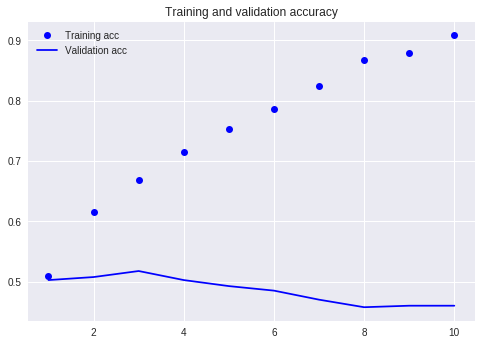

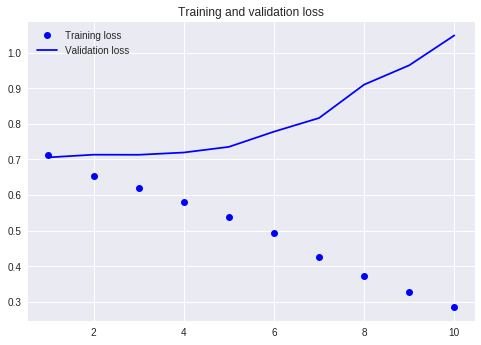

In [219]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [229]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(max_words, embedding_dim))
model.add(LSTM(units, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, None, 300)         3000000   
_________________________________________________________________
lstm_16 (LSTM)               (None, 32)                42624     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 3,042,657
Trainable params: 3,042,657
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [231]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save("mymodel_with_dropout.h5")

Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 11s 7ms/step - loss: 0.7139 - acc: 0.4906 - val_loss: 0.6974 - val_acc: 0.5125
Epoch 2/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.6980 - acc: 0.5325 - val_loss: 0.7032 - val_acc: 0.4975
Epoch 3/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.6955 - acc: 0.5375 - val_loss: 0.6968 - val_acc: 0.5275
Epoch 4/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.6905 - acc: 0.5425 - val_loss: 0.7019 - val_acc: 0.4725
Epoch 5/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.6852 - acc: 0.5519 - val_loss: 0.6999 - val_acc: 0.5175
Epoch 6/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.6867 - acc: 0.5550 - val_loss: 0.7027 - val_acc: 0.5125
Epoch 7/10
1600/1600 [==============================] - 6s 4ms/step - loss: 0.6796 - acc: 0.5481 - val_loss: 0.7066 - val_acc: 0.4950
Epoch 8/10
160

In [220]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM, Bidirectional

units = 32

model = Sequential()
model.add(Embedding(max_words, embedding_dim))
model.add(Bidirectional(LSTM(units, dropout=0.5, recurrent_dropout=0.5)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, None, 300)         3000000   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 64)                85248     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 3,085,313
Trainable params: 3,085,313
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [222]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save("mymodel_bidirectional_with_dropout.h5")

Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 15s 9ms/step - loss: 0.7094 - acc: 0.5188 - val_loss: 0.7002 - val_acc: 0.5300
Epoch 2/10
1600/1600 [==============================] - 10s 7ms/step - loss: 0.7035 - acc: 0.5225 - val_loss: 0.6926 - val_acc: 0.5350
Epoch 3/10
1600/1600 [==============================] - 10s 6ms/step - loss: 0.6988 - acc: 0.5200 - val_loss: 0.7008 - val_acc: 0.5250
Epoch 4/10
1600/1600 [==============================] - 10s 6ms/step - loss: 0.6934 - acc: 0.5294 - val_loss: 0.7011 - val_acc: 0.5050
Epoch 5/10
1600/1600 [==============================] - 10s 6ms/step - loss: 0.6923 - acc: 0.5262 - val_loss: 0.6877 - val_acc: 0.5400
Epoch 6/10
1600/1600 [==============================] - 10s 6ms/step - loss: 0.6794 - acc: 0.5613 - val_loss: 0.6933 - val_acc: 0.5325
Epoch 7/10
1600/1600 [==============================] - 10s 6ms/step - loss: 0.6736 - acc: 0.5731 - val_loss: 0.6939 - val_acc: 0.5175
Epoch 8/

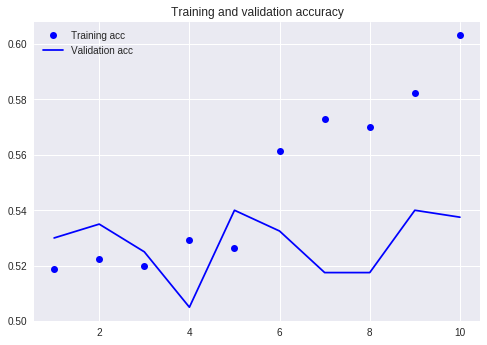

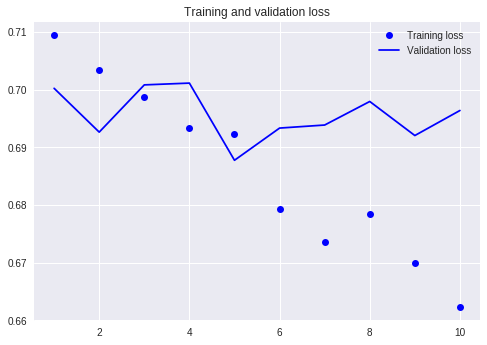

In [223]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
import keras.backend as K
from keras.layers import Embedding, Flatten, Dense, Bidirectional, LSTM, Activation, RepeatVector, Permute
from keras import Input
from keras.models import Model

In [0]:
input_layer = Input(shape=[maxlen], dtype='int32')

In [0]:
units = 32

In [0]:
embedded = Embedding(
        input_dim=max_words,
        output_dim=embedding_dim,
        input_length=maxlen
    )(input_layer)

In [0]:
activations = Bidirectional(LSTM(units, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(embedded)

In [0]:
attention = Dense(1, activation='tanh')(activations)
attention = Flatten()(attention)
attention = Activation('softmax')(attention)
attention = RepeatVector(units*2)(attention)
attention = Permute([2, 1])(attention)

In [0]:
from keras import layers

In [0]:
sent_representation = layers.Multiply()([activations, attention])
sent_representation = layers.Lambda(lambda xin: K.sum(xin, axis=-2), output_shape=(units*2,))(sent_representation)

output_layer = Dense(1, activation='sigmoid')(sent_representation)

In [0]:
model = Model(input_layer, output_layer)

In [202]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_12 (Embedding)        (None, 100, 300)     3000000     input_2[0][0]                    
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 100, 64)      85248       embedding_12[0][0]               
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 100, 1)       65          bidirectional_4[0][0]            
__________________________________________________________________________________________________
flatten_3 

In [0]:
model.layers[1].set_weights([embedding_matrix])
model.layers[1].trainable = False

In [0]:
import keras

In [0]:
callbacks = [keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')]

In [206]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                   callbacks=callbacks)

Train on 1600 samples, validate on 400 samples
Epoch 1/20
1600/1600 [==============================] - 14s 9ms/step - loss: 0.7069 - acc: 0.5012 - val_loss: 0.6955 - val_acc: 0.5125
Epoch 2/20
1600/1600 [==============================] - 11s 7ms/step - loss: 0.6958 - acc: 0.5156 - val_loss: 0.7194 - val_acc: 0.5125
Epoch 3/20
1600/1600 [==============================] - 11s 7ms/step - loss: 0.6946 - acc: 0.5219 - val_loss: 0.7044 - val_acc: 0.5125
Epoch 4/20
1600/1600 [==============================] - 11s 7ms/step - loss: 0.6955 - acc: 0.4919 - val_loss: 0.6961 - val_acc: 0.4825
Epoch 5/20
1600/1600 [==============================] - 11s 7ms/step - loss: 0.6947 - acc: 0.5125 - val_loss: 0.6942 - val_acc: 0.5150
Epoch 6/20
1600/1600 [==============================] - 11s 7ms/step - loss: 0.6928 - acc: 0.5138 - val_loss: 0.6943 - val_acc: 0.4850
Epoch 7/20
1600/1600 [==============================] - 11s 7ms/step - loss: 0.6906 - acc: 0.5444 - val_loss: 0.6990 - val_acc: 0.4900
Epoch 8/

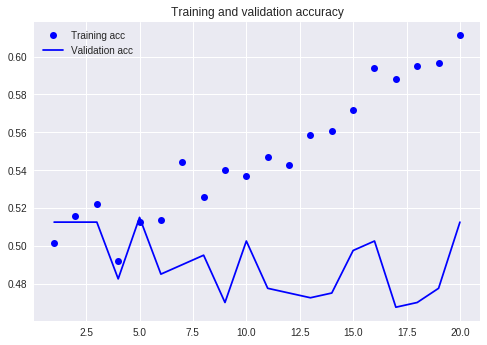

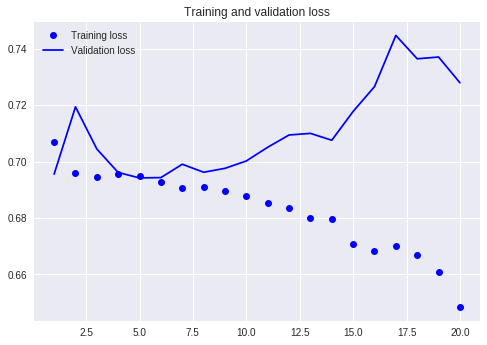

In [207]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()